In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('C:/Users/CVR/Downloads/inventory_data_noisy.csv')
data.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [3]:
data.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [4]:
data.describe()

,Quantity,Consumption
count,18268.000000,18268.000000
mean,59.105704,12.938526
std,71.085667,13.313527
min,10.000000,5.000000
25%,32.000000,8.000000
50%,54.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18360 non-null  object 
 1   Product_ID   18360 non-null  object 
 2   Date         18360 non-null  object 
 3   Quantity     18268 non-null  float64
 4   Consumption  18268 non-null  float64
 5   Location     18176 non-null  object 
dtypes: float64(2), object(4)
memory usage: 860.8+ KB


In [9]:
data['Quantity'].fillna(data['Quantity'].mean(),inplace=True)
data['Consumption'].fillna(data['Consumption'].mean(),inplace=True)
data.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

In [10]:
data['Location'].fillna(data['Location'].mode()[0],inplace=True)
data.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [11]:
data.duplicated().sum()

349

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

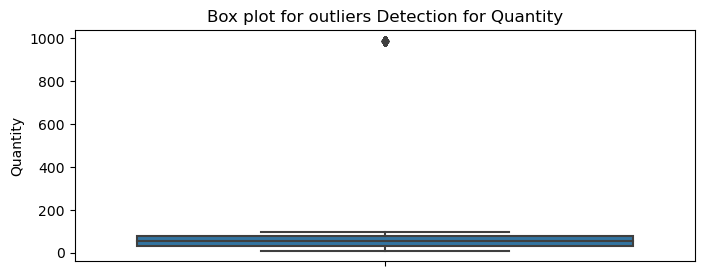

In [19]:
plt.figure(figsize=(8, 3))
df=data

sns.boxplot(data=df,y='Quantity')
plt.title("Box plot for outliers Detection for Quantity")
plt.show()


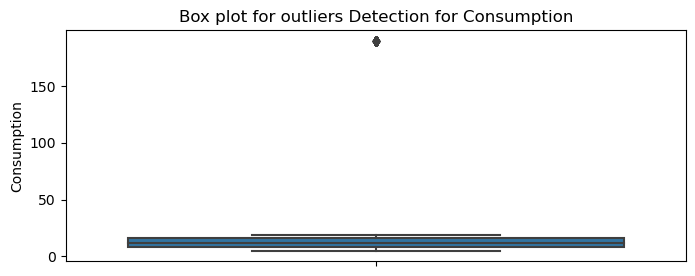

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,y='Consumption')
plt.title("Box plot for outliers Detection for Consumption")
plt.show()

Text(0.5, 1.0, 'Distribution of Consumption using histplot')

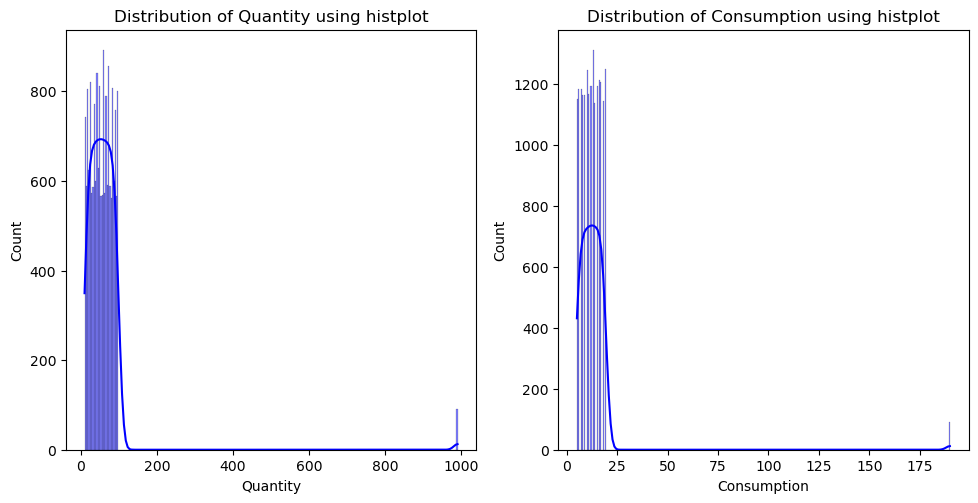

In [ ]:
plt.figure(figsize=(18, 12))

## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity using histplot')

plt.subplot(2, 3, 2)
sns.histplot(df['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption using histplot')

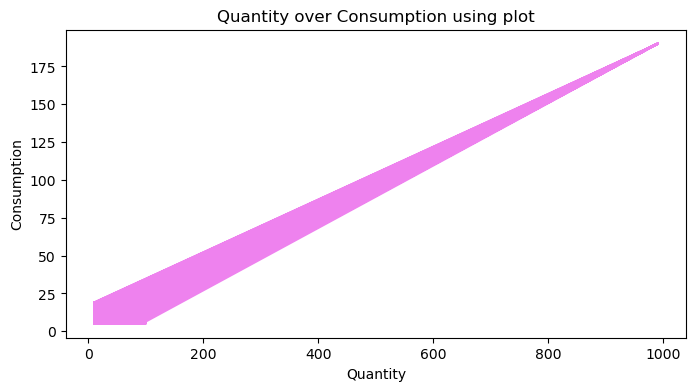

In [26]:
plt.figure(figsize=(8,4))

plt.plot(df['Quantity'],df['Consumption'],linestyle="-", color="violet")
plt.title("Quantity over Consumption using plot")
plt.xlabel("Quantity")
plt.ylabel("Consumption")
plt.show()

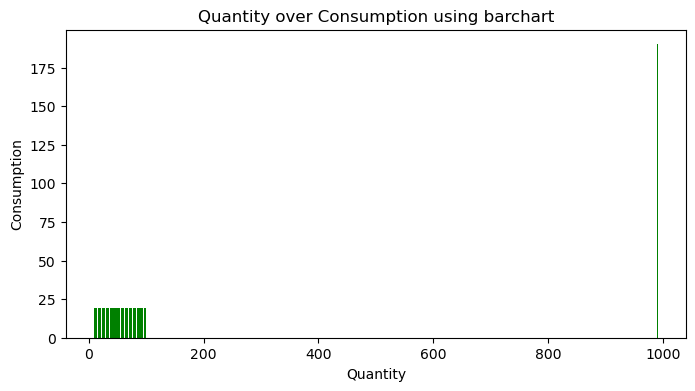

In [28]:
plt.figure(figsize=(8,4))

plt.bar(df['Quantity'],df['Consumption'], color="green")
plt.title("Quantity over Consumption using barchart")
plt.xlabel("Quantity")
plt.ylabel("Consumption")
plt.show()


In [36]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Select the columns for outlier removal (adjust as needed)
columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)




Text(0.5, 1.0, 'Distribution of Consumption using histplot')

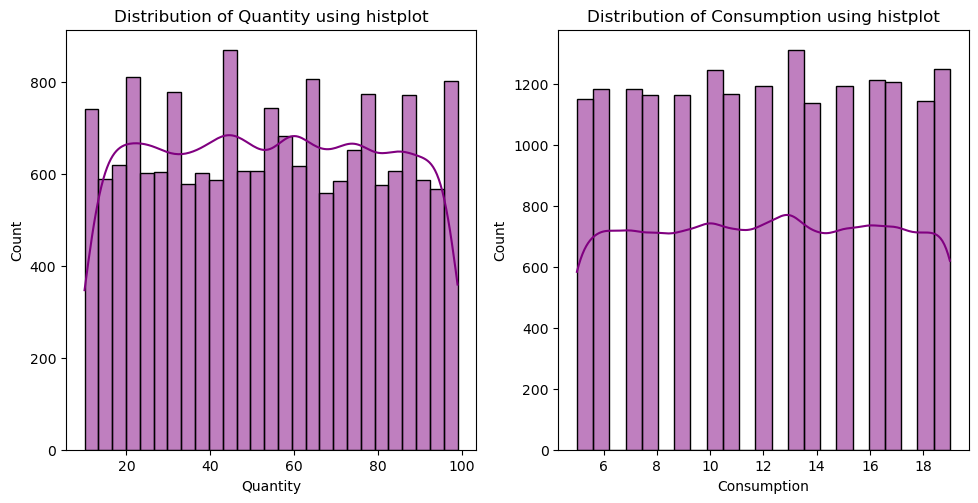

In [31]:
plt.figure(figsize=(18, 12))

## Distribution of numerical columns
plt.subplot(2, 3, 1)
sns.histplot(df['Quantity'], kde=True, color='purple')
plt.title('Distribution of Quantity using histplot')

plt.subplot(2, 3, 2)
sns.histplot(df['Consumption'], kde=True, color='purple')
plt.title('Distribution of Consumption using histplot')

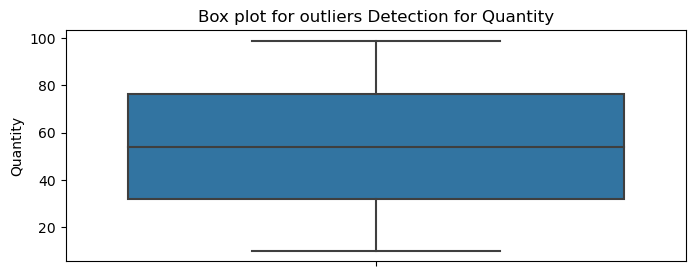

In [37]:
plt.figure(figsize=(8, 3))

sns.boxplot(data=df,y='Quantity')
plt.title("Box plot for outliers Detection for Quantity")
plt.show()

In [38]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [39]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 4 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location']


In [40]:
## Adding column requirement based on Quantity and Consumption
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [41]:
# Create a new categorical target column
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [44]:

df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


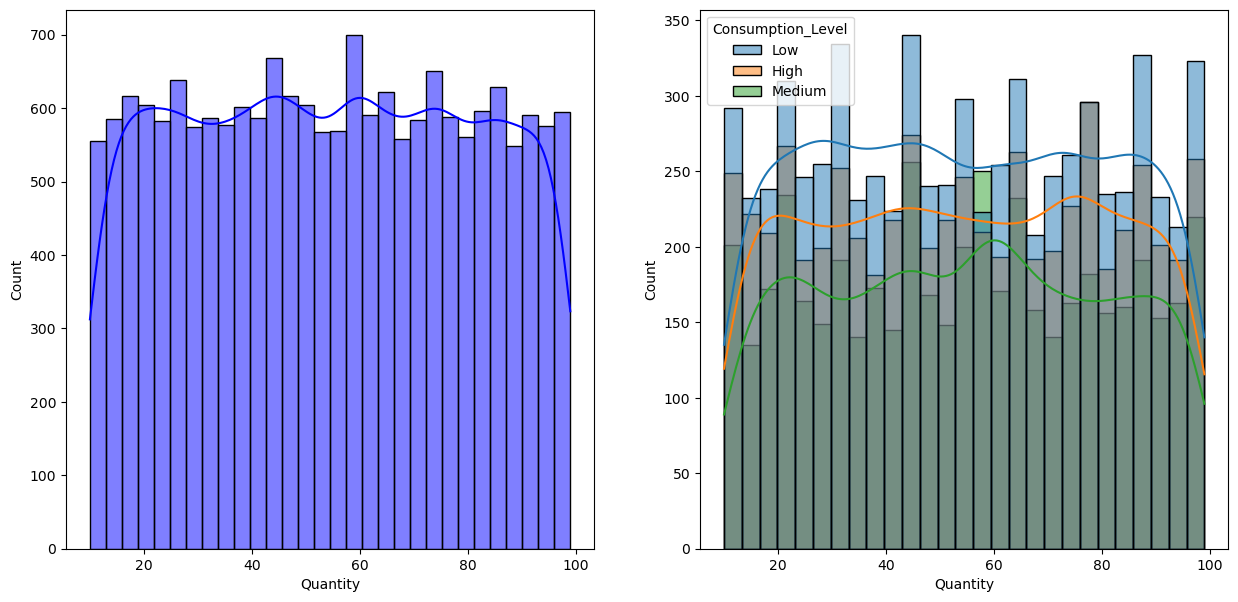

In [47]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

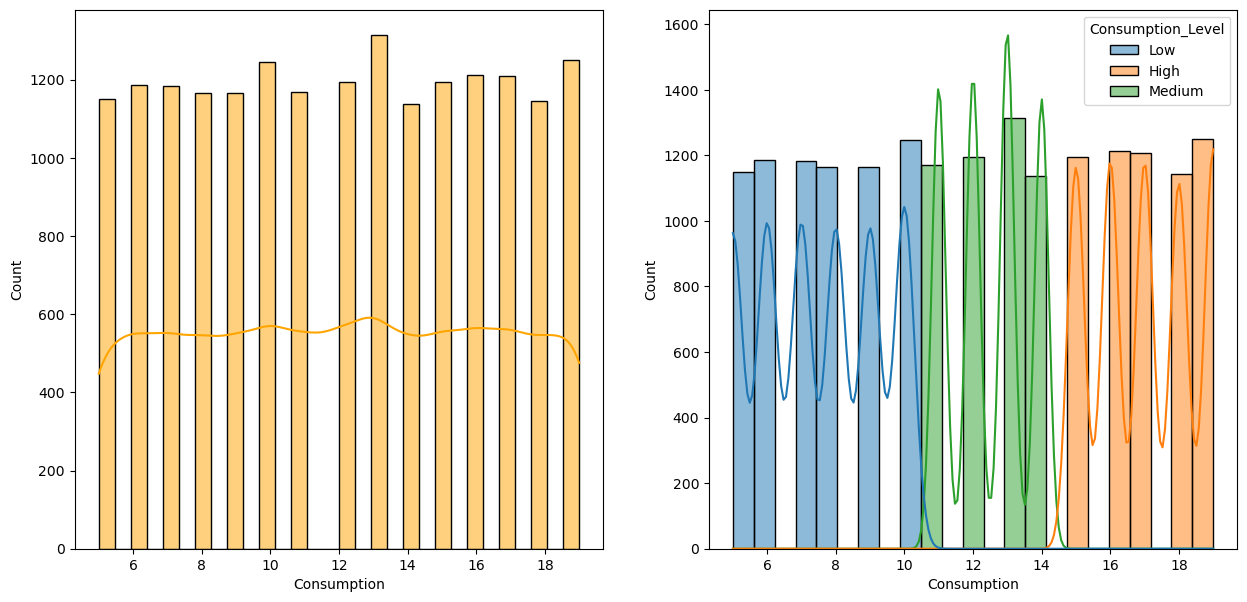

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='orange')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_10908\2102351087.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\CVR\AppData\Local\Temp\ipykernel_10908\2102351087.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\CVR\AppData\Local\Temp\ipykernel_10908\2102351087.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


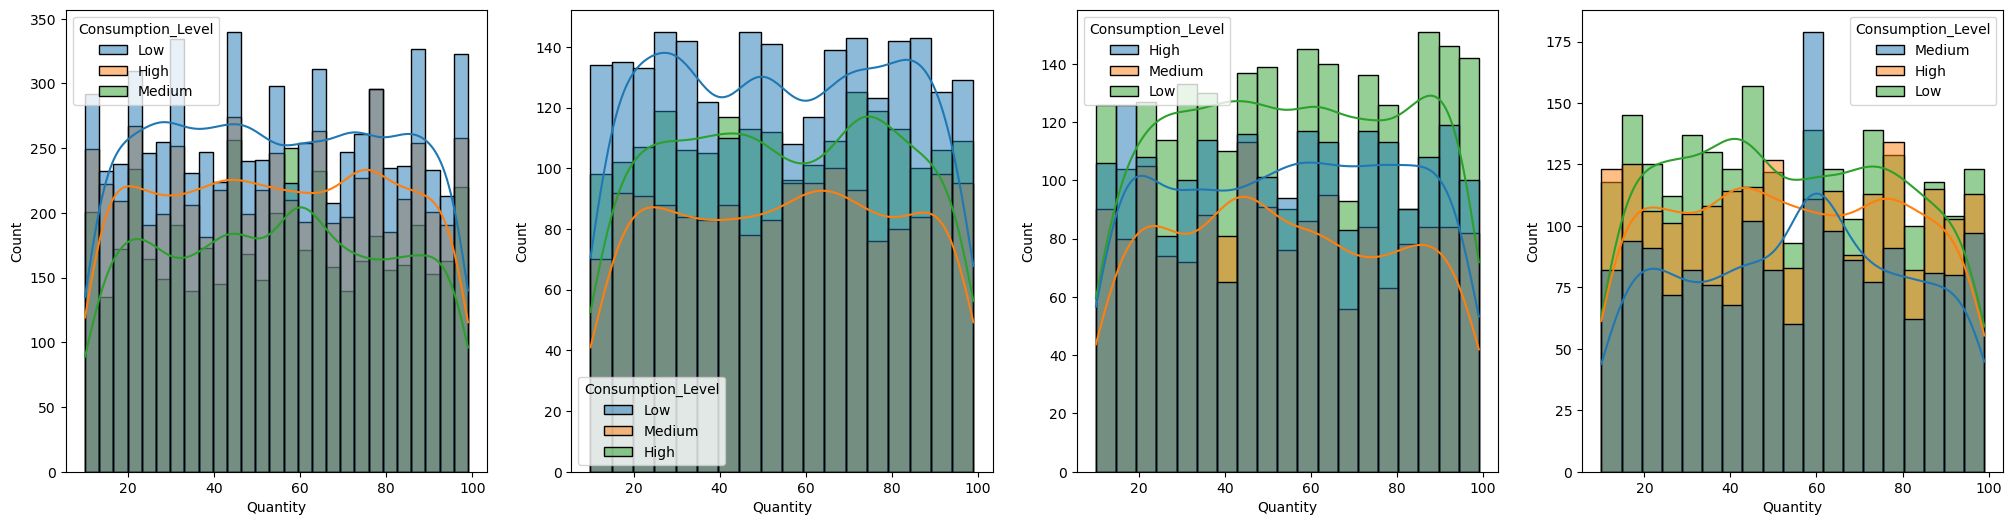

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()